### 데이터 읽어오기

In [70]:
import pandas as pd

In [71]:
Movie_Data = pd.read_csv("../ml-latest-small/movies.csv")
Movie_Data = Movie_Data.set_index("movieId")

### Save Data

In [72]:
Movie_Data.to_csv("../ml-latest-small/Movie_Data.csv")

### 개봉연도 데이터 전처리(Preprocessing)

In [73]:
Movie_Data['year'] = Movie_Data['title'].str.extract('(\(\d\d\d\d\))')
Movie_Data['year'] = Movie_Data['year'].str.extract('(\d\d\d\d)').fillna('2050')

### 가장 빈도수가 높은 개봉연도 찾기

In [74]:
Movie_Data['year'].value_counts()

2002    311
2006    295
2001    294
2007    284
2000    283
       ... 
1915      1
1921      1
1919      1
1922      1
1908      1
Name: year, Length: 107, dtype: int64

### Seaborn 라이브러리로 시각화하기

In [75]:
%matplotlib inline

import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='year', ylabel='count'>

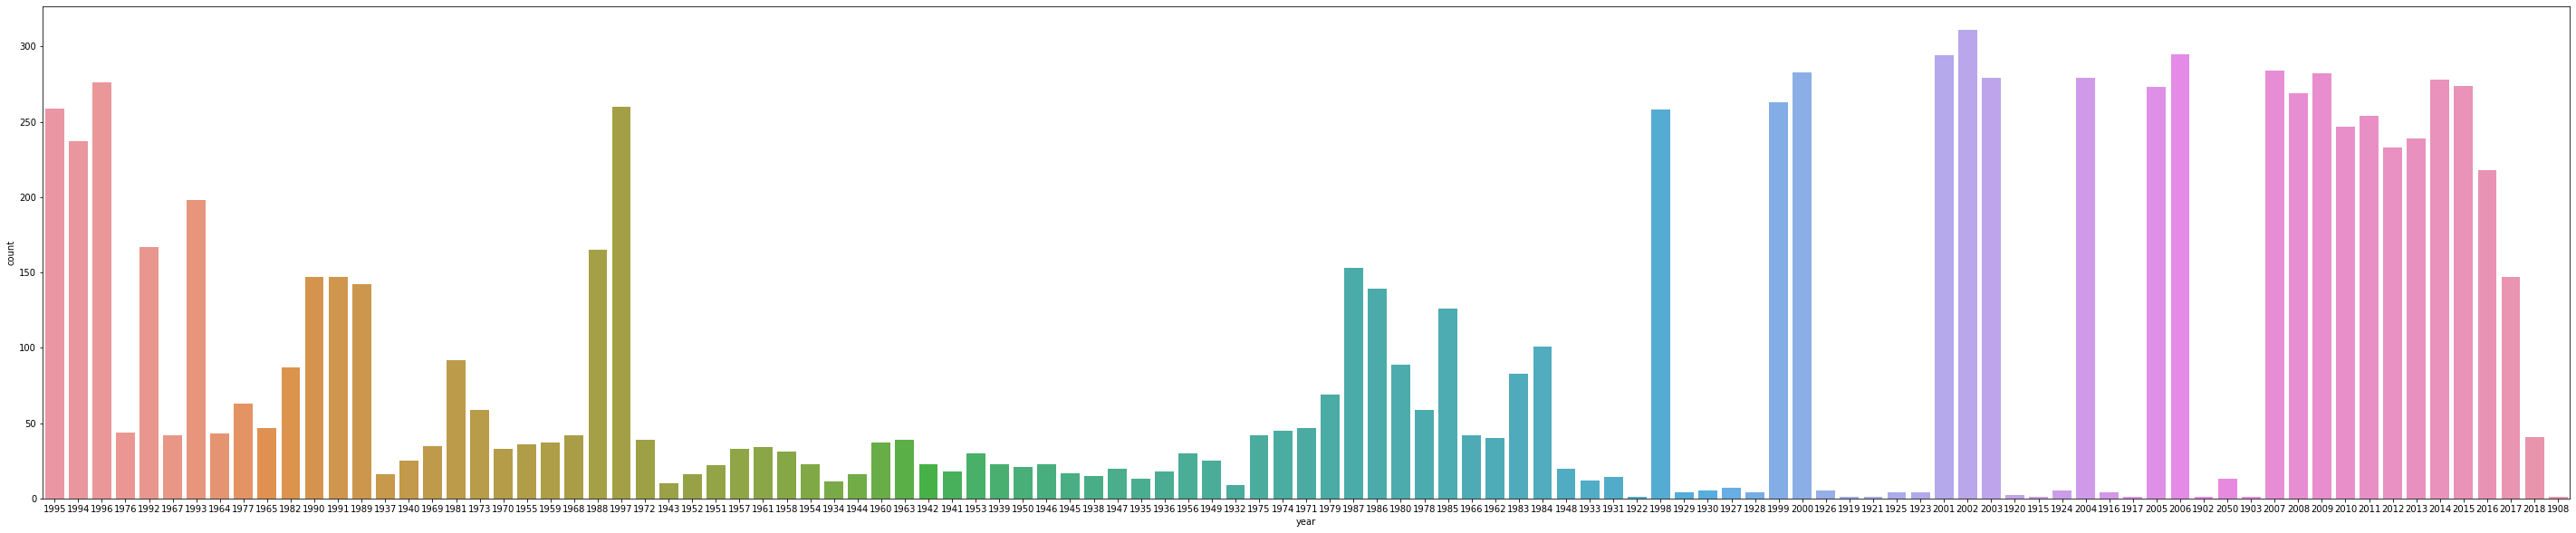

In [76]:
# plt.figure(figsize=(50, 10))
# sns.countplot(data = Movie_Data, x = 'year')

### genres 분석

In [79]:
genres_list = list(Movie_Data['genres'].apply(lambda x: x.split("|")))

flat_list = list()

for sublist in genres_list:
    for item in sublist:
        flat_list.append(item)

genres_unique = list(set(flat_list))

['Musical',
 'Comedy',
 'Romance',
 'Sci-Fi',
 'IMAX',
 'Children',
 'War',
 'Mystery',
 'Film-Noir',
 'Drama',
 'Action',
 'Horror',
 'Adventure',
 '(no genres listed)',
 'Documentary',
 'Thriller',
 'Animation',
 'Fantasy',
 'Crime',
 'Western']

In [80]:
genres_dummies = Movie_Data['genres'].str.get_dummies(sep = "|")
genres_dummies.to_pickle("../ml-latest-small/genres.p")

In [60]:
genres_p = pd.read_pickle("../ml-latest-small/genres.p")
genres_p

,(no genres listed),Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
movieId,,,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0
5,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193581,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193583,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0
193585,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0


<AxesSubplot:>

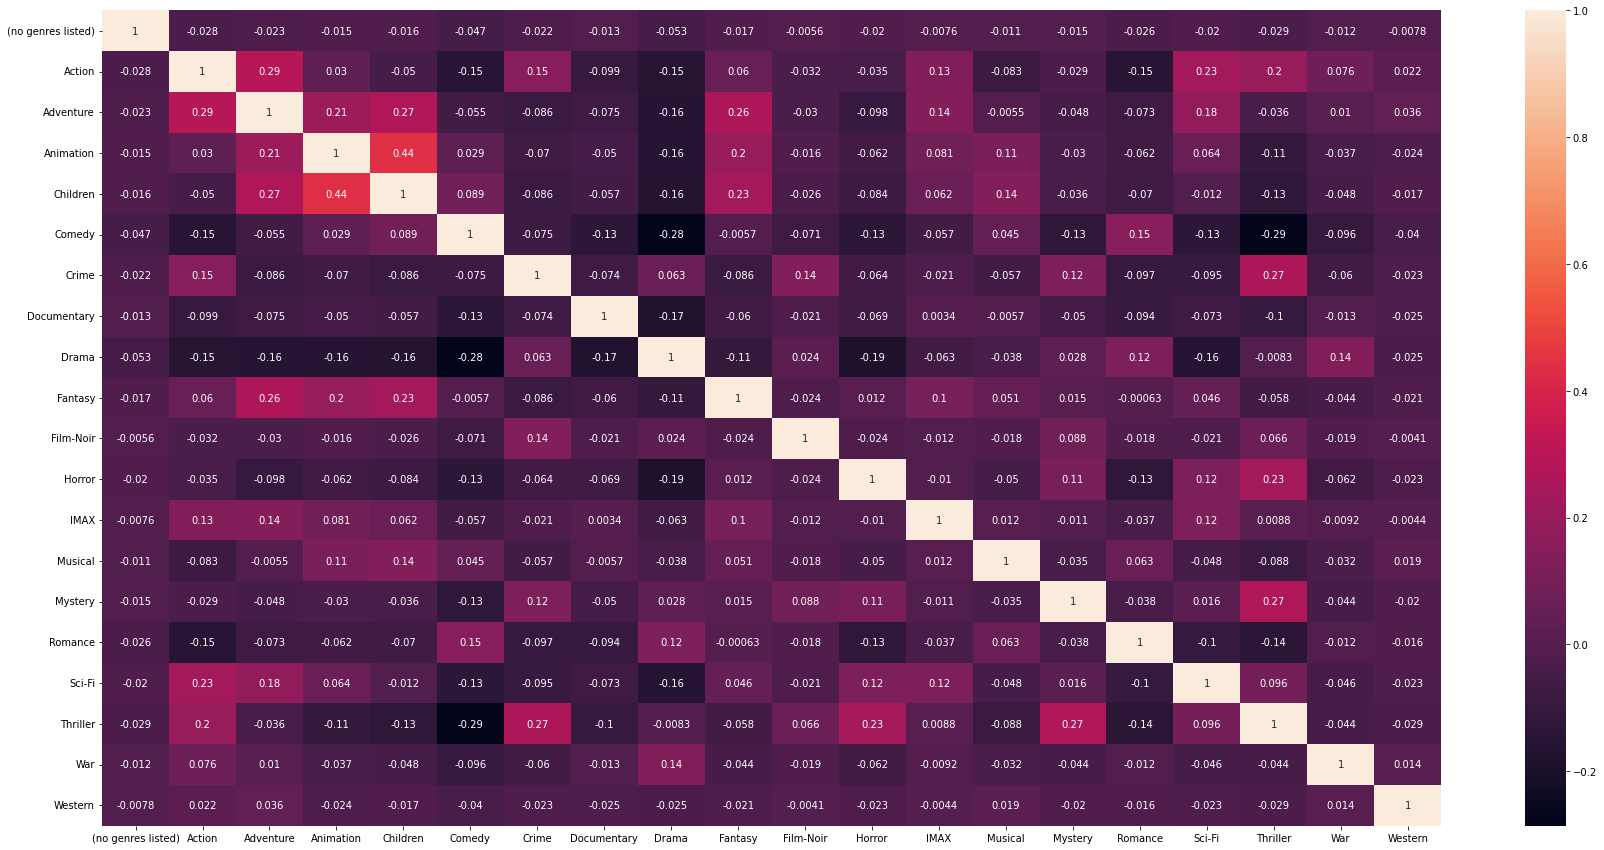

In [83]:
# 두 장르의 관계가 1에 가까울수록 두 장르가 함께 자주 출현
# 두 장르의 관계가 -1에 가까울수록 두 장르가 아주 드물게 함께 출현
plt.figure(figsize=(30, 15))
sns.heatmap(genres_dummies.corr(), annot = True)
